# Exercise - Investigate High Paying Skills

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# retrieve US data jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop NaN values from column for plotting
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [14]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills', 'count']]

,salary_year_avg,job_skills,count
109,89000.0,python,16958
109,89000.0,r,16958
109,89000.0,alteryx,16958
109,89000.0,tableau,16958
180,90250.0,excel,16958
...,...,...,...
784882,87500.0,sql,16958
784882,87500.0,vba,16958
784882,87500.0,tableau,16958
784882,87500.0,excel,16958


In [34]:
df_DA_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

df_DA_top_pay = df_DA_group.sort_values('median', ascending = False).head(10)

df_DA_skills = df_DA_group.sort_values('count', ascending = False).head(10).sort_values('median', ascending = False)

df_DA_skills

,median,count
job_skills,,
python,97500.00,1431
tableau,92875.00,1364
r,92500.00,893
sql server,92500.00,286
sql,91000.00,2508
sas,90000.00,926
power bi,90000.00,838
powerpoint,85000.00,462
excel,84392.00,1808


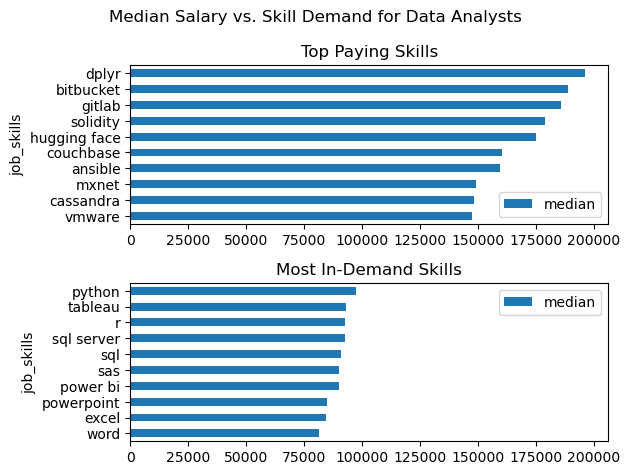

In [41]:
fig, ax = plt.subplots(2, 1)

# [:: - 1] does the same thing as ax[1].invert_yaxis(). both are sorting in descending order

df_DA_top_pay[:: - 1].plot(kind = 'barh', y = 'median', ax = ax[0], title = 'Top Paying Skills')

df_DA_skills.plot(kind = 'barh', y = 'median', ax = ax[1], title = 'Most In-Demand Skills')
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())

fig.suptitle('Median Salary vs. Skill Demand for Data Analysts')
plt.tight_layout()
plt.show()